[Problem Overview](https://www.kaggle.com/competitions/vector-borne-disease-classification-challenge)

In [41]:
# !kaggle competitions download -c vector-borne-disease-classification-challenge

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [43]:
df = pd.read_csv('train.csv')

In [44]:
df.tail(5)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
702,702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plague
703,703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
704,704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
705,705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague
706,706,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Tungiasis


In [45]:
df['prognosis_encoded'], unique_categories = pd.factorize(df['prognosis'])
print(unique_categories, len(unique_categories))
df['prognosis_encoded'].value_counts()

Index(['Lyme_disease', 'Tungiasis', 'Zika', 'Rift_Valley_fever',
       'West_Nile_fever', 'Malaria', 'Chikungunya', 'Plague', 'Dengue',
       'Yellow_Fever', 'Japanese_encephalitis'],
      dtype='object') 11


prognosis_encoded
4     85
10    81
1     70
3     70
6     66
8     63
9     61
2     58
7     53
0     52
5     48
Name: count, dtype: int64

In [46]:
X = df.drop(columns=['id', 'prognosis'])
y = df['prognosis_encoded']
num_classes = len(unique_categories)
# Split the data into train, dev, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
X_dev_np = X_dev.to_numpy()


# One-hot encode the target variable
y_train_np = to_categorical(y_train, num_classes=num_classes)
y_test_np = to_categorical(y_test, num_classes=num_classes)
y_dev_np = to_categorical(y_dev, num_classes=num_classes)

print(X_train_np.shape, y_train_np.shape)
print(X_test_np.shape, y_test_np.shape)
print(X_dev_np.shape, y_dev_np.shape)

(600, 65) (600, 11)
(53, 65) (53, 11)
(54, 65) (54, 11)


In [47]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(10, activation='relu'),
    Dense(len(unique_categories), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

C:\Users\Ajay\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 20)             │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 11)             │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,651 (6.45 KB)

 Trainable params: 1,651 (6.45 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='max', verbose=1, restore_best_weights=True)

history = model.fit(X_train_np, y_train_np, 
                    validation_data=(X_dev_np, y_dev_np), 
                    epochs=10, 
                    batch_size=8)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5281 - loss: 1.4628 - val_accuracy: 0.4630 - val_loss: 1.3460
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5460 - loss: 1.3387 - val_accuracy: 0.5000 - val_loss: 1.2618
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5954 - loss: 1.2235 - val_accuracy: 0.5370 - val_loss: 1.1579
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 1.1567 - val_accuracy: 0.5926 - val_loss: 1.0784
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 1.1001 - val_accuracy: 0.6481 - val_loss: 1.0381
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6602 - loss: 1.0505 - val_accuracy: 0.6481 - val_loss: 0.9909
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - loss: 0.9799 - val_accuracy: 0.6852 - val_loss: 0.9513
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.9285 - val_accuracy: 0.6667 - val_loss:

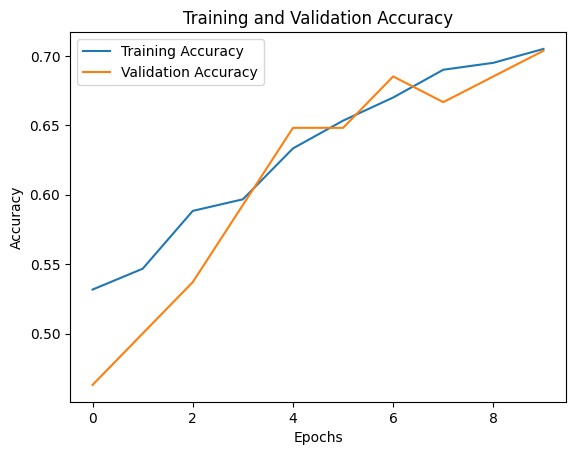

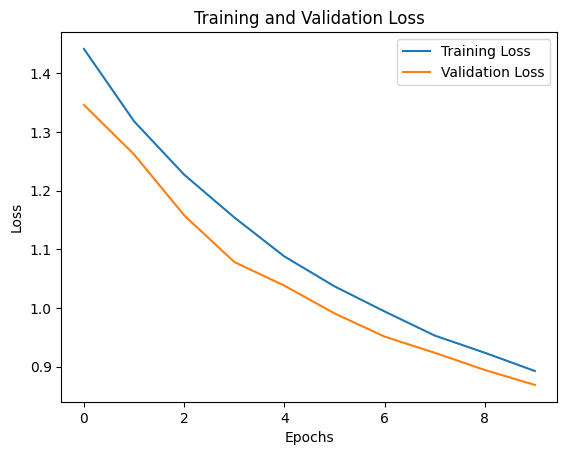

In [53]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Test Loss: 1.228128433227539
Test Accuracy: 0.5660377144813538


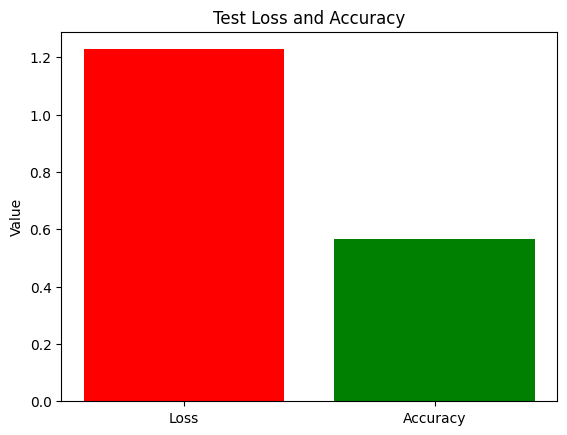

In [54]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_np, y_test_np, verbose=0)

# Print the test accuracy and loss
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the test accuracy and loss
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'green'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()

In [51]:
model.save('vector_borne_disease_model.h5')